In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
cwd = os.getcwd()

NOTEBOOK_DIR = os.path.dirname(cwd)
ROOT = os.path.dirname(os.path.dirname(os.path.dirname(NOTEBOOK_DIR)))

FIGURES_DIR = os.path.join(ROOT, 'figures/abc_parameterizations/initialization')
CONFIG_PATH = os.path.join(ROOT, 'pytorch/configs/abc_parameterizations/fc_abc.yaml')

In [3]:
import sys
sys.path.append(ROOT)

In [4]:
import torch

from utils.tools import read_yaml, set_random_seeds
from utils.plot.abc_parameterizations.initializations import *
from pytorch.configs.model import ModelConfig
from pytorch.models.abc_params.fully_connected import ntk, ip, muP, ipllr
from pytorch.models.abc_params.fully_connected.standard_fc_ip import StandardFCIP

### Load basic configuration and define variables 

In [5]:
L = 5
SEED = 42

set_random_seeds(SEED)  # set random seed for reproducibility
config_dict = read_yaml(CONFIG_PATH)

config_dict['architecture']['n_layers'] = L + 1
base_model_config = ModelConfig(config_dict)

In [6]:
n_trials = 200
widths = [25, 50, 128, 256, 512, 750, 1024, 1200, 1400]
x = 2 * torch.rand(base_model_config.architecture["input_size"], requires_grad=False) - 1

# 1. With ReLU

## NTK 

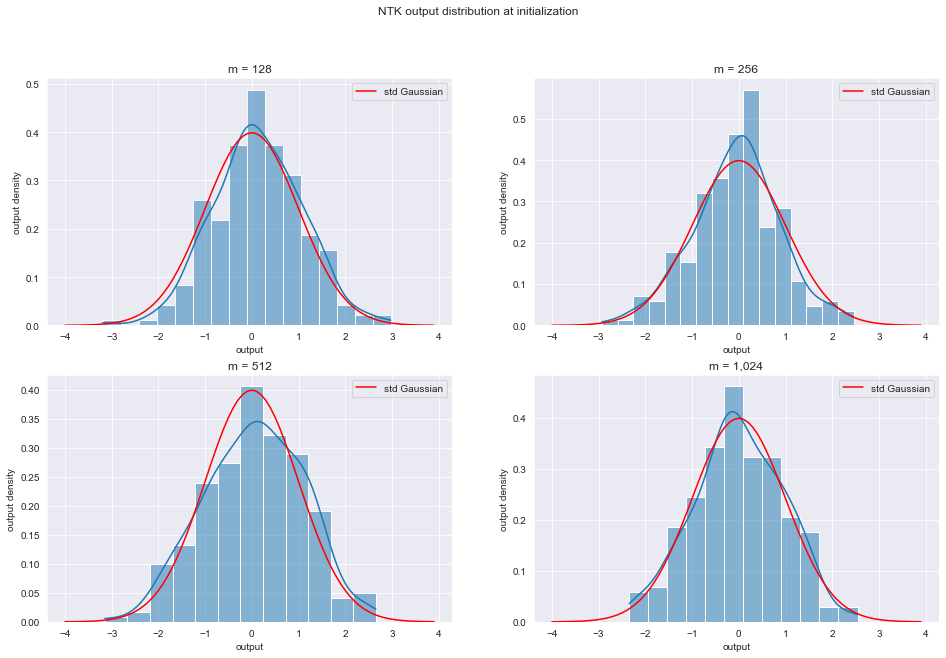

In [7]:
ntk_n_trials = 250
ntk_widths = [128, 256, 512, 1024]
fig_path = os.path.join(FIGURES_DIR, 'ntk_outputs_dist_L={}.png'.format(L))
plot_init_outputs_dist(fig_path, 'NTK', ntk.FCNTK, ntk_n_trials, ntk_widths, base_model_config, x=x, 
                       figsize=(16,10))

### muP

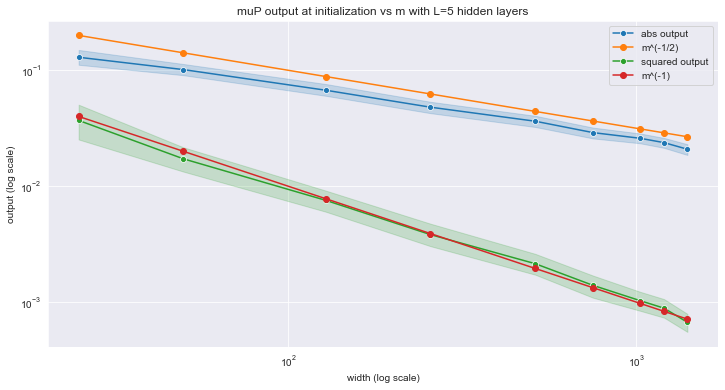

In [8]:
fig_path = os.path.join(FIGURES_DIR, 'muP_outputs_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'muP', muP.FCmuP, n_trials, widths, base_model_config, x=x)

### IP

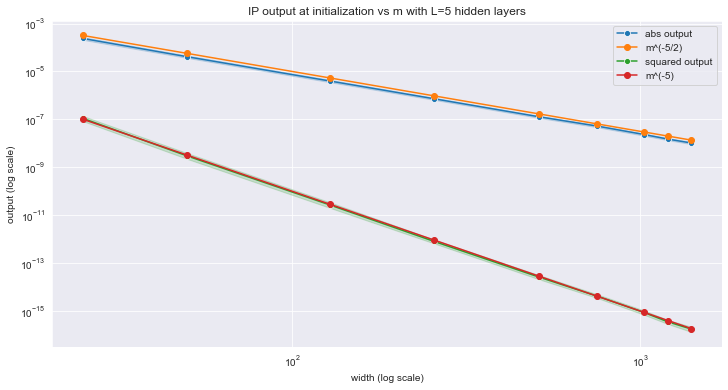

In [9]:
fig_path = os.path.join(FIGURES_DIR, 'ip_outputs_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'IP', ip.FCIP, n_trials, widths, base_model_config, x=x, c=0.)

### Standard IP

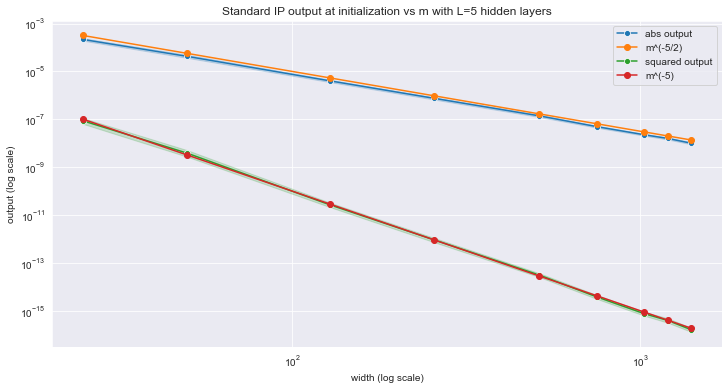

In [10]:
fig_path = os.path.join(FIGURES_DIR, 'standard_ip_outputs_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'Standard IP', StandardFCIP, n_trials, widths, base_model_config, x=x)

### IP-LLR

Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using defaul

Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using defaul

Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using defaul

Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using defaul

Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using defaul

Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using default calibration
Using defaul

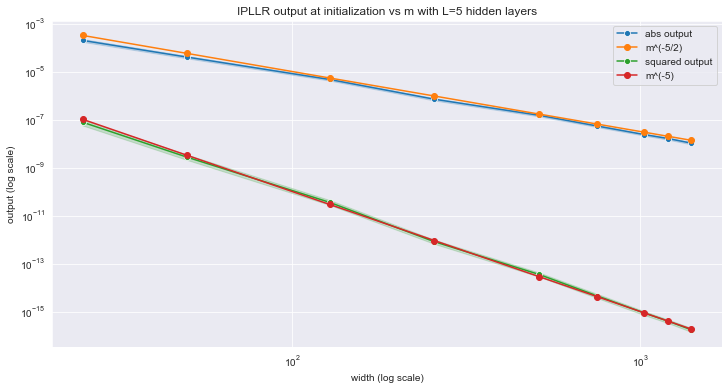

In [11]:
fig_path = os.path.join(FIGURES_DIR, 'ipllr_outputs_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'IPLLR', ipllr.FcIPLLR, n_trials, widths, base_model_config, x=x)

# 2. With GeLU

### var = 2

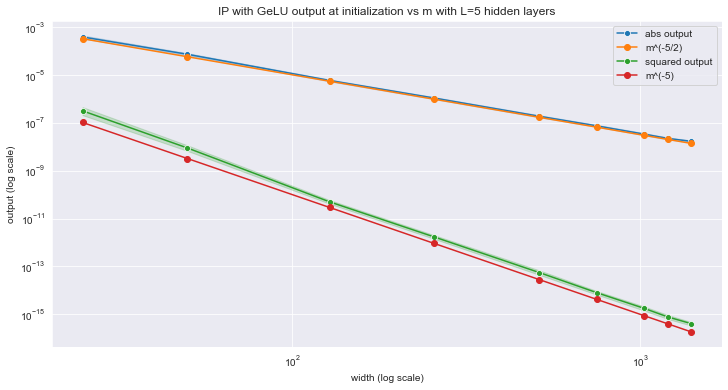

In [12]:
# default value for variance is 2.0
config = deepcopy(base_model_config)
config.activation.name = "gelu"
fig_path = os.path.join(FIGURES_DIR, 'ip_outputs_gelu_var_2_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'IP with GeLU', ip.FCIP, n_trials, widths, config, x=x, 
                                    c=0.)

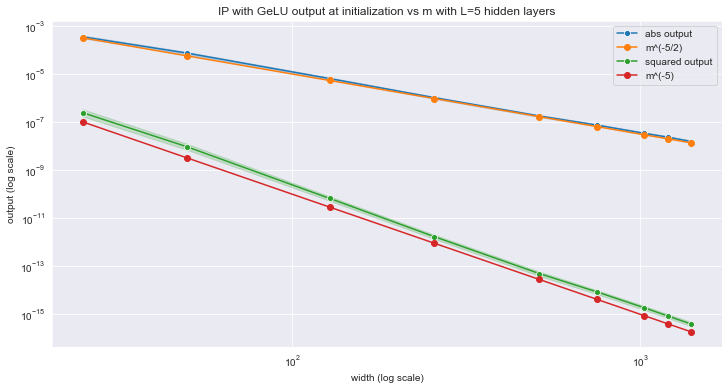

In [13]:
# default value for variance is 2.0
config = deepcopy(base_model_config)
config.activation.name = "gelu"
fig_path = os.path.join(FIGURES_DIR, 'ip_outputs_gelu_var_2_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'IP with GeLU', ip.FCIP, n_trials, widths, config, x=x, 
                                    c=0.)

### var = 4

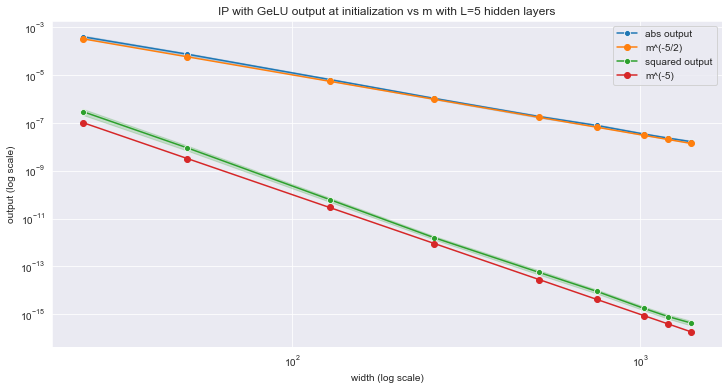

In [14]:
var = 4.0
config = deepcopy(base_model_config)
config.activation.name = "gelu"
config.initializer.params["var"] = var
fig_path = os.path.join(FIGURES_DIR, 'ip_outputs_gelu_var_4_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'IP with GeLU', ip.FCIP, n_trials, widths, config, x=x, 
                                    c=0.)

# 3. With ELU

### var = 2

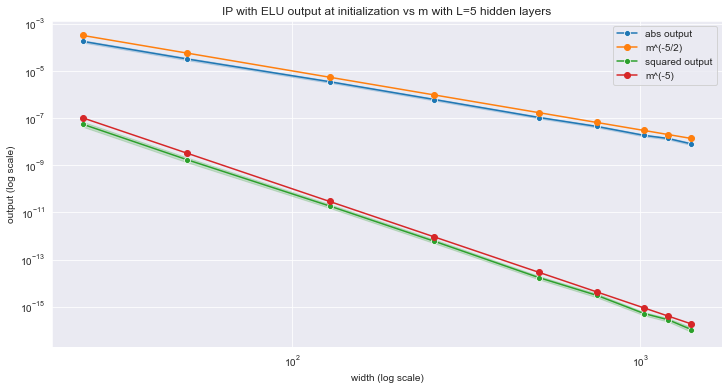

In [15]:
# default value for variance is 2.0
config = deepcopy(base_model_config)
config.activation.name = "elu"
fig_path = os.path.join(FIGURES_DIR, 'ip_outputs_elu_var_2_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'IP with ELU', ip.FCIP, n_trials, widths, config, x=x, 
                                    c=0.)

### var = 1

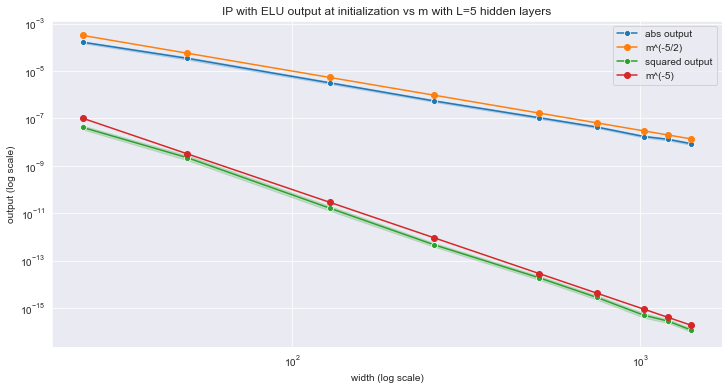

In [16]:
var = 1.0
config = deepcopy(base_model_config)
config.activation.name = "elu"
config.initializer.params["var"] = var
fig_path = os.path.join(FIGURES_DIR, 'ip_outputs_elu_var_1_L={}.png'.format(L))
results_df = plot_init_outputs_vs_m(fig_path, 'IP with ELU', ip.FCIP, n_trials, widths, config, x=x, 
                                    c=0.)